In [32]:
%config InlineBackend.figure_format='retina'
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 20)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

from keras.models import Sequential
from keras.losses import mean_squared_error
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from keras import utils
import math

# loading the MNIST (or digits) dataset in keras
from keras.datasets import mnist

In [47]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from ipywidgets import interact
import copy

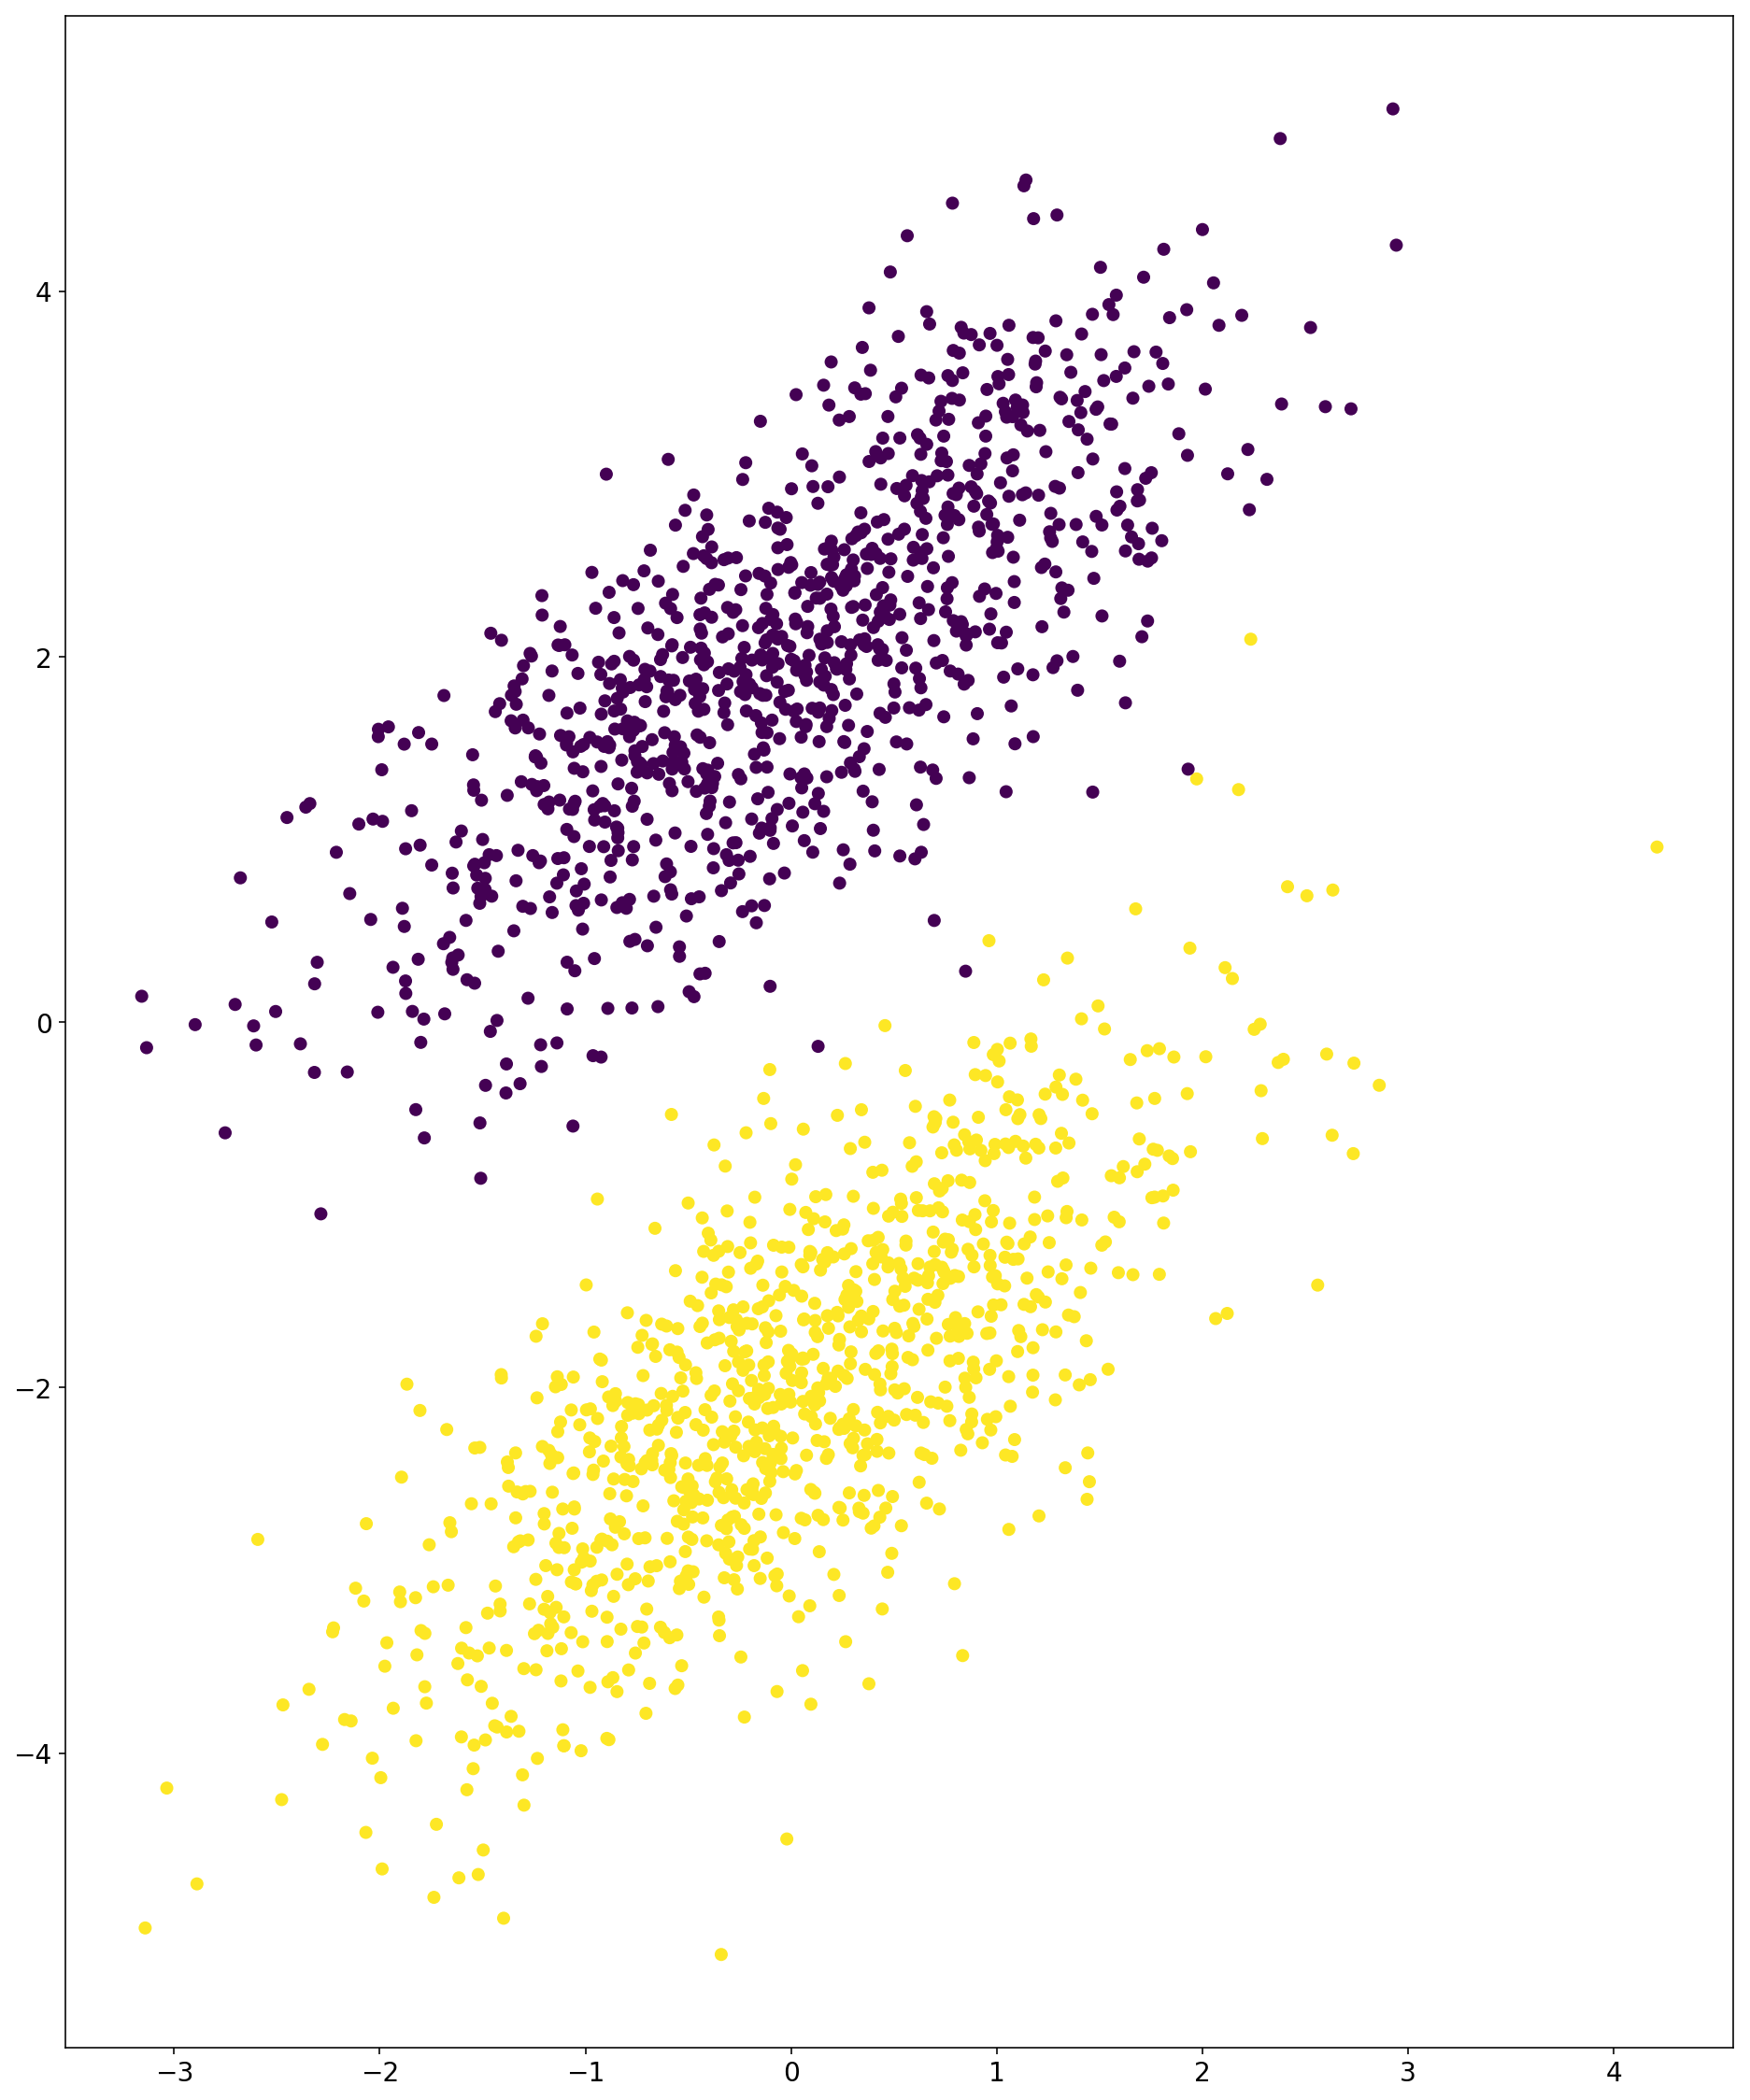

In [48]:


N = 1000
m1 = (1,1)
m2 = (1,4)
C = ((1,0.75), (0.75,1))
g1 = np.random.multivariate_normal((0, -2), C, N)
g2 = np.random.multivariate_normal((0, +2), C, N)

X = np.vstack((g1, g2))
y = np.hstack((np.ones(N), np.zeros(N)))

plt.scatter(X[:,0], X[:,1], c=y);



My estimate for 1st PCA components is a perpendicular distance between the point and origin defined by average point location and the 2nd is the distance from the central axis. In other words, corrdinate system will be have origin in the center defiend by average location, one axis will connect points of average blue and average yellow location and the second one will be perpendicular on it.

In [49]:
pca = PCA(2)
pca.fit(X)
pca.components_


array([[ 0.16631114,  0.98607333],
       [ 0.98607333, -0.16631114]])

[ 0.74975396  4.44535706]
[ 1.8402027  -0.31036861]


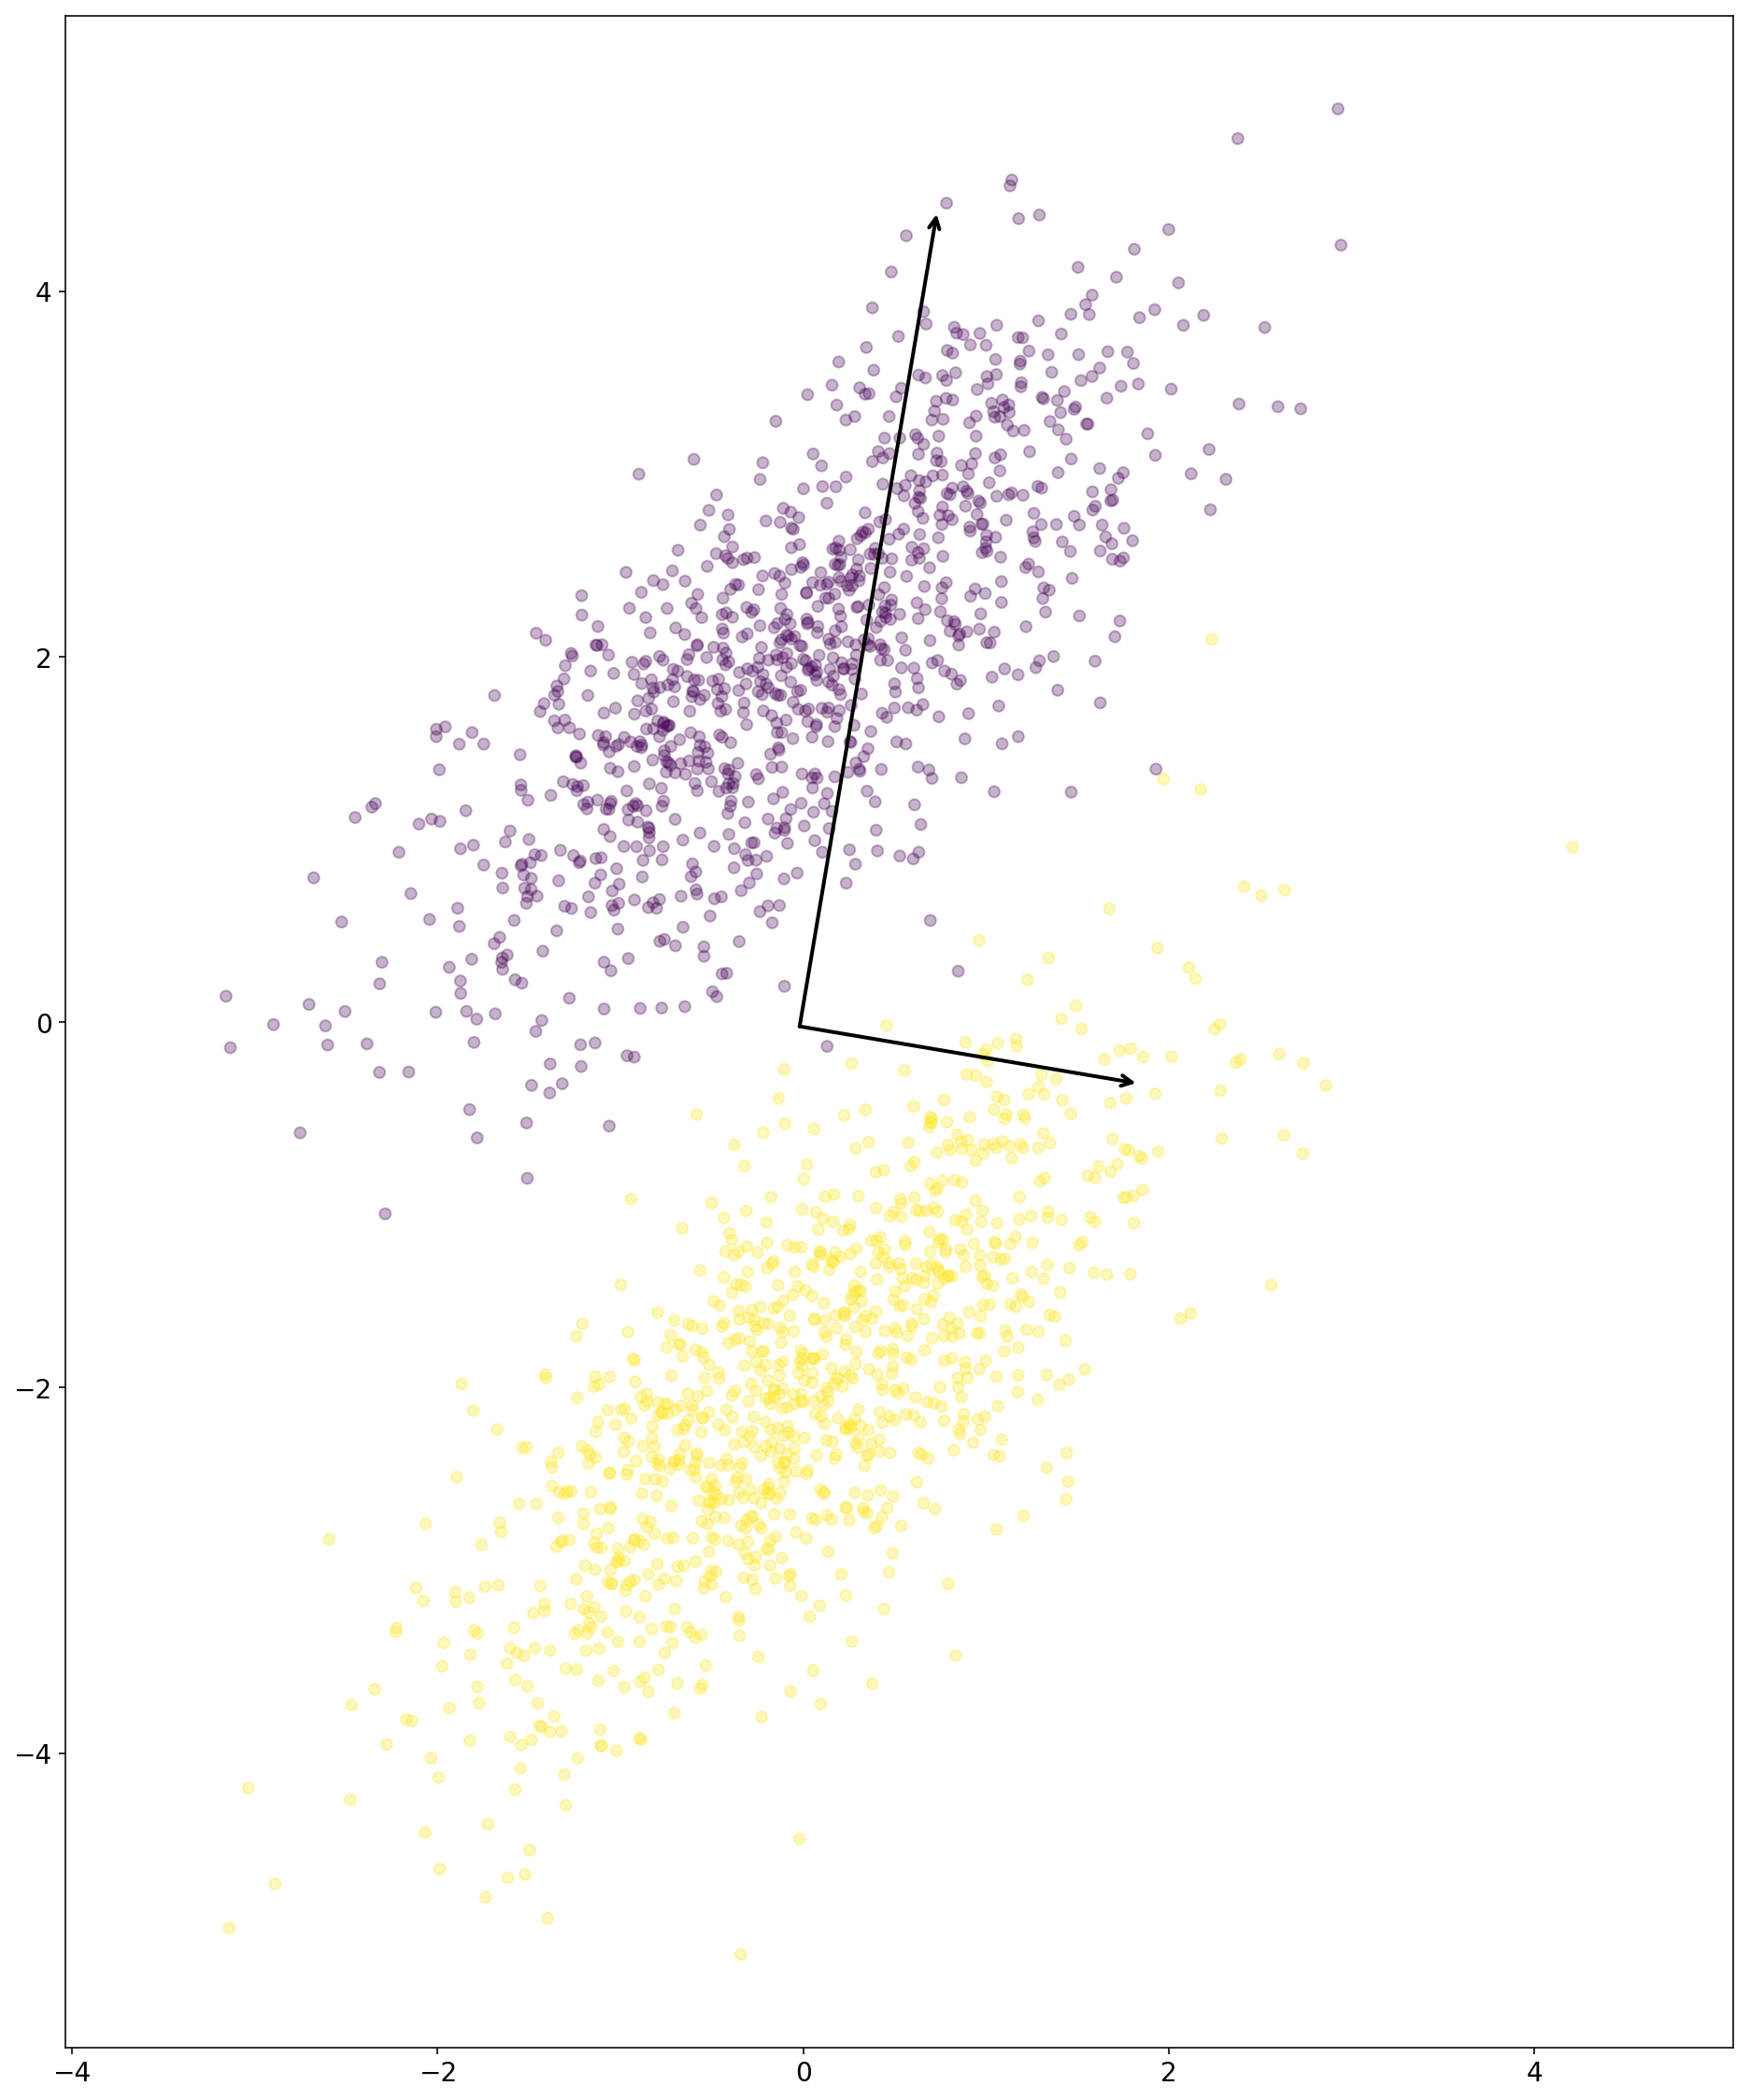

In [50]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3,c=y)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    print(v)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Surprisingly, the observed components are not as expected yet they still look reasonable.

In [51]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('shape of transformed data:', X_pca.shape)
print('First five data points after transform:')
print(X_pca[:5])

shape of transformed data: (2000, 1)
First five data points after transform:
[[-2.4857399 ]
 [-0.90320432]
 [-0.43564043]
 [-2.12209553]
 [-2.39806286]]


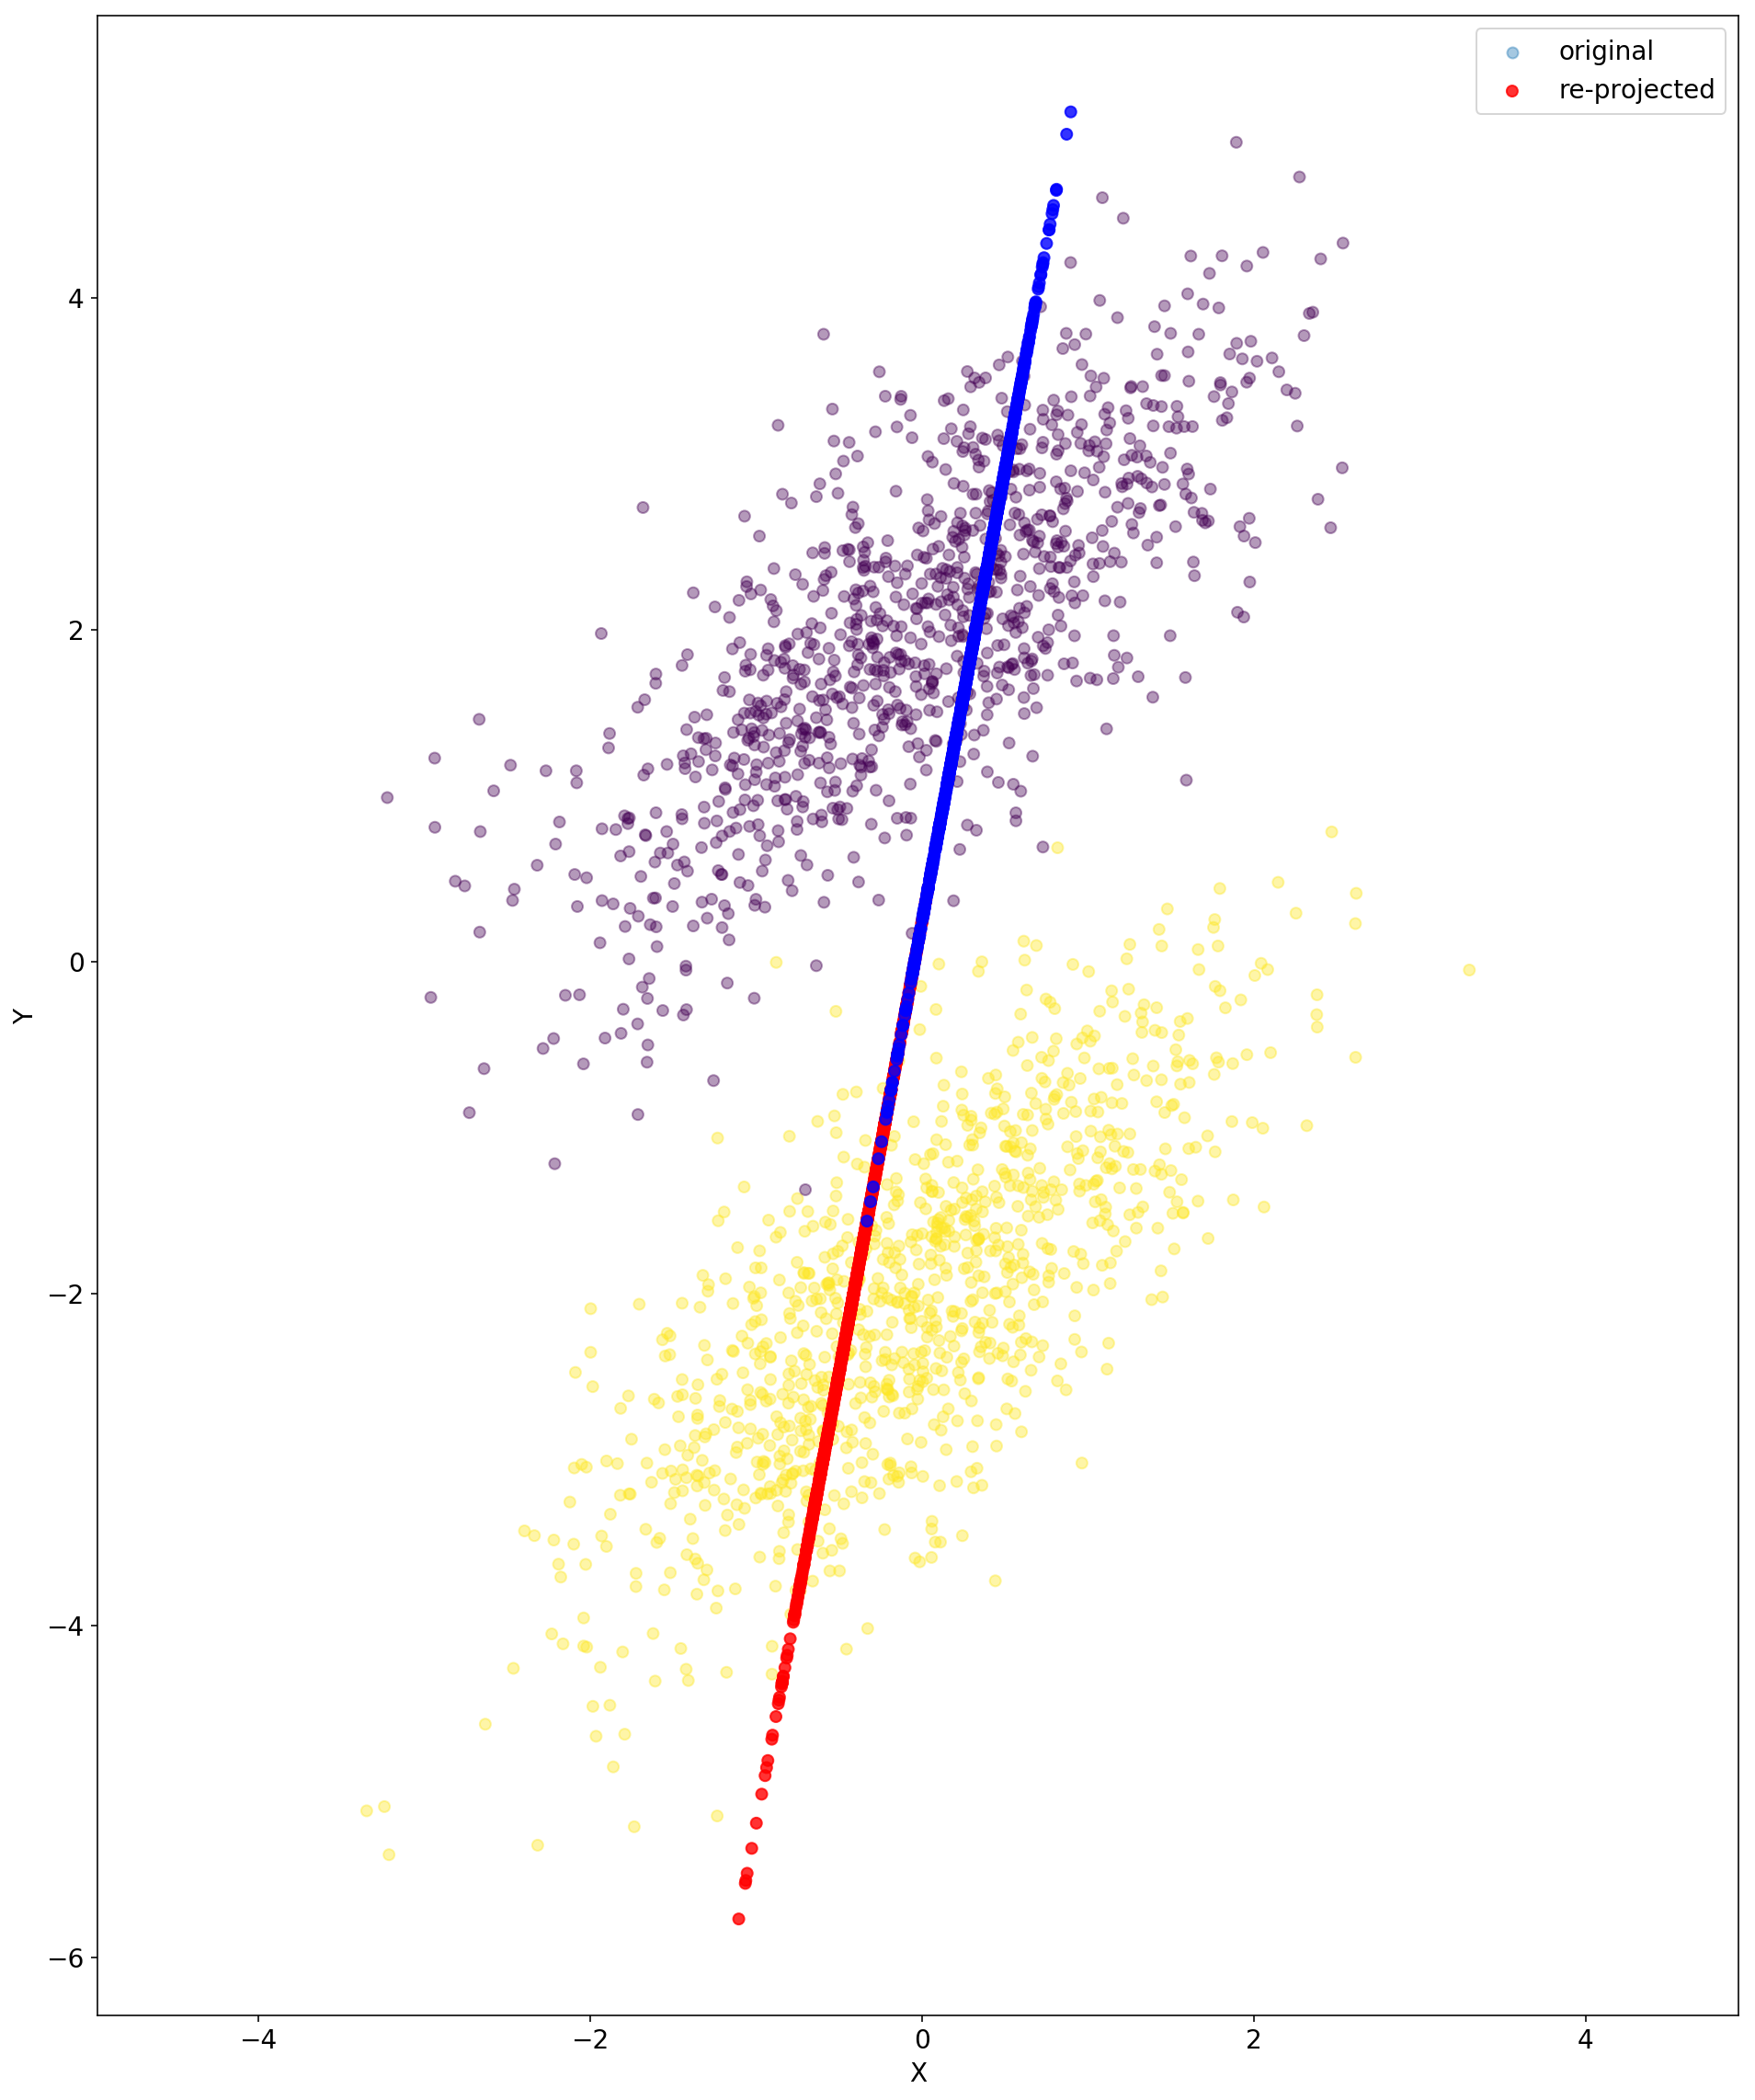

In [41]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, label='original', c=y)
labels = ["b", "r"]
yy = np.take(labels, (y == 1))

plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='re-projected', c=(yy))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='best')
plt.axis('equal');

This technique allows us to separate components using only one dimensional parameter which would be a location on the line on datapoints represented by blue and red, which means we can separate points based only on first compoments to some extend. However, there is a central region where we see points of both categories which means that separation was not succesfull.

In [108]:
from matplotlib import colors
def plot_data(lda, X, y, y_pred):
    splot = plt
    
    plt.title('Linear Discriminant Analysis')


    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    alpha = 1

    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', alpha=alpha,
             color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '*', alpha=alpha,
             color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', alpha=alpha,
             color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '*', alpha=alpha,
             color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='YlGn',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')



    return splot

(-3.5258513231754383,
 4.578155063280172,
 -5.6065197853603603,
 5.5017486104823918)

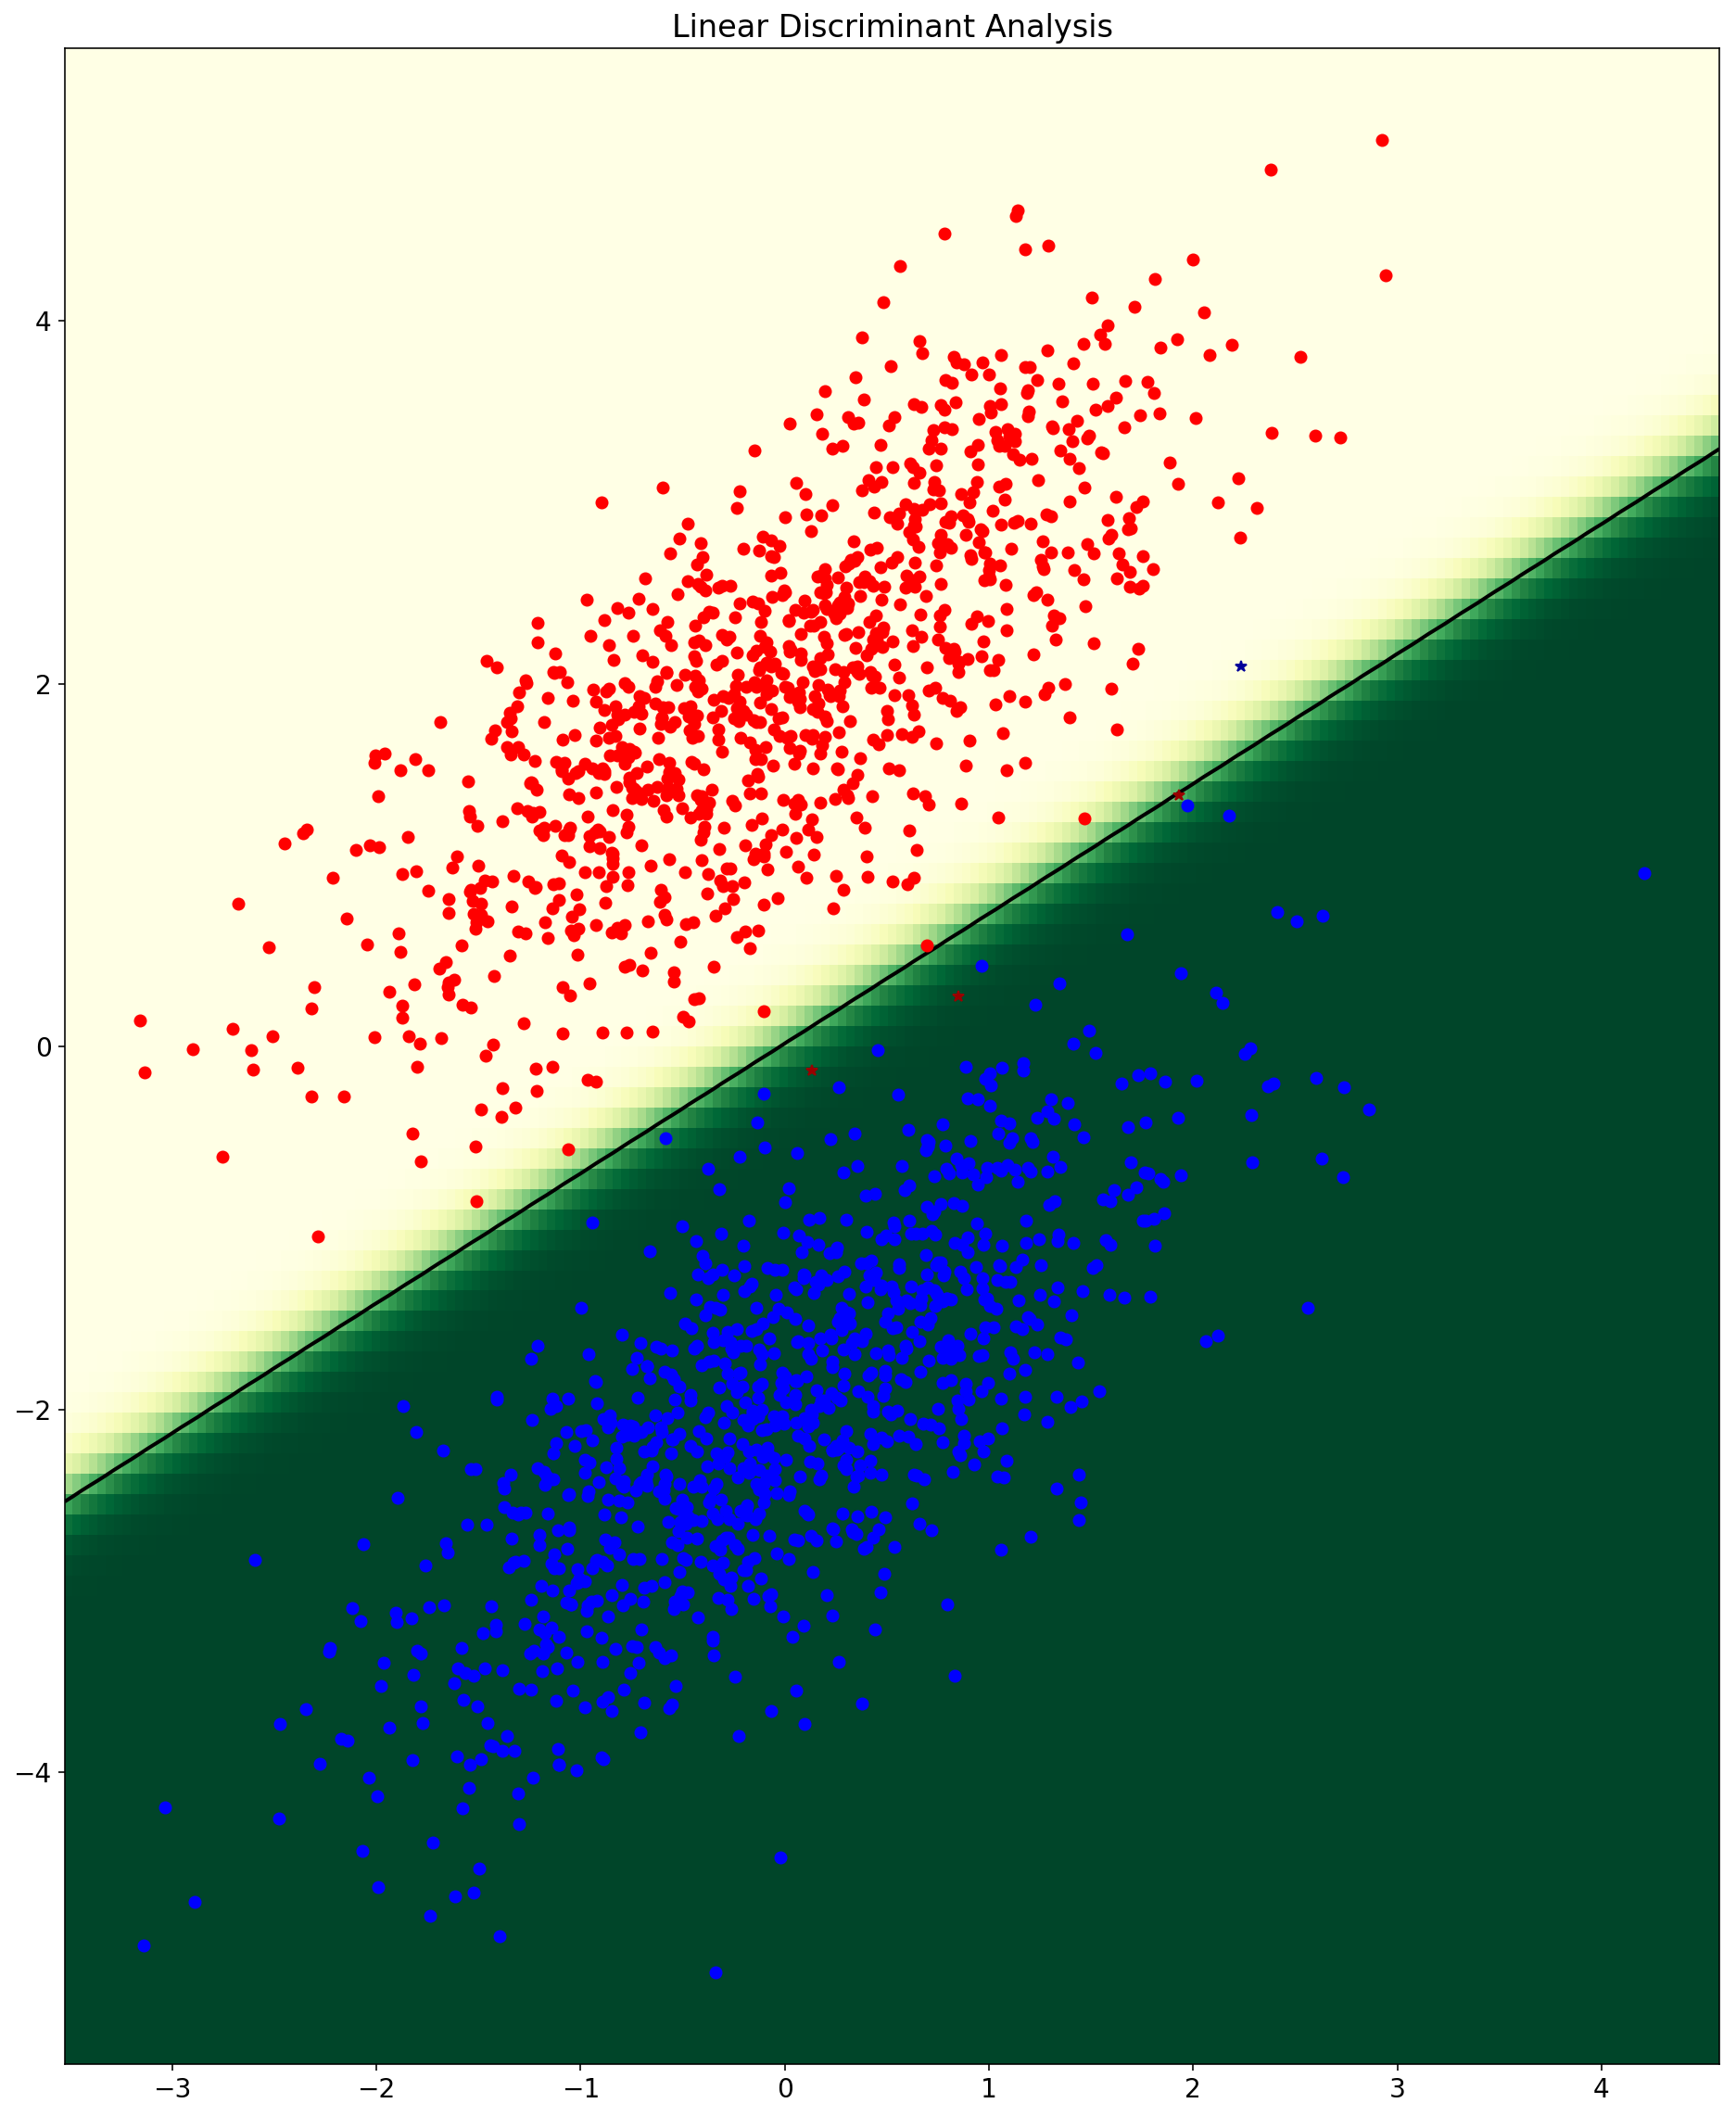

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X)
splot = plot_data(lda, X, y, y_pred)
#plot_lda_cov(lda, splot)
plt.axis('tight')



LDA delivers excellent performance. PCA fails to deliver excellent performance as the dimensionality reduction from 2dim to 1dim means that is too hard. As PCA performs better for reduction from high number of dimensions becasue pricipal components are more important from the last order compoments which carry only little information, we see poor PCA performance for 2 dimensions as the second dimensions still carries important information.